In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image

In [7]:
train = pd.read_csv('/kaggle/input/fiu-cap5610-spring-2023/train.csv')
train.head(6)
train.query('id == 1337') ['class']
train['class'].iloc[0]

'C3'

In [8]:
train_image = []
for i in tqdm(range(train.shape[0])):
    #img = load_img('/kaggle/input/fiu-cap5610-spring-2023/images/'+ str(train['id'][i]) +'.png')
    image = Image.open('/kaggle/input/fiu-cap5610-spring-2023/images/'+ str(train['id'][i]) +'.png')
    img = image.convert('L')
    img = img_to_array(img)
    img = img.astype('float32') / 255
    train_image.append(img)
X = np.array(train_image)


100%|██████████| 4000/4000 [00:29<00:00, 134.32it/s]


In [9]:
X.shape

(4000, 112, 224, 1)

In [10]:
#X = np.mean(X, axis=3)
train.columns

Index(['id', 'class'], dtype='object')

In [ ]:
plt.imshow(X[2])

In [11]:
Y = train.drop('id', axis=1)['class']
print(type(Y))

<class 'pandas.core.series.Series'>


In [12]:
def convertStr(x):
    if(x == 'A0'):
        return 0
    elif(x == 'A1'):
        return 1
    elif(x == 'A2'):
        return 2
    elif(x == 'A3'):
        return 3
    elif(x == 'A4'):
        return 4
    elif(x == 'B0'):
        return 5
    elif(x == 'B1'):
        return 6
    elif(x == 'B2'):
        return 7
    elif(x == 'B3'):
        return 8
    elif(x == 'B4'):
        return 9
    elif(x == 'C0'):
        return 10
    elif(x == 'C1'):
        return 11
    elif(x == 'C2'):
        return 12
    elif(x == 'C3'):
        return 13
    elif(x == 'C4'):
        return 14
    elif(x == 'D0'):
        return 15
    elif(x == 'D1'):
        return 16
    elif(x == 'D2'):
        return 17
    elif(x == 'D3'):
        return 18
    elif(x == 'D4'):
        return 19

In [13]:
dataList = []
for x in Y:
    dataList.append(convertStr(x))

In [15]:
#print(dataList)

In [16]:
Y = np.array(dataList).reshape((4000, 1))

In [17]:
Y.shape

(4000, 1)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3000, 112, 224, 1) (3000, 1)
(1000, 112, 224, 1) (1000, 1)


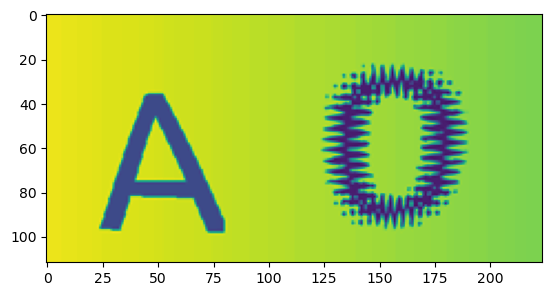

A0


In [19]:
import matplotlib.pyplot as plt

label_str = ['A0', 'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4','C0', 'C1', 'C2', 'C3', 'C4', 'D0', 'D1', 'D2', 'D3', 'D4']
img_id = 999
image = X_train[img_id]
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label_str[label[0]])

In [20]:
from tensorflow.keras.utils import to_categorical

num_classes = 20
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

print(Y_train.shape, Y_test.shape)

(3000, 20) (1000, 20)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(112, 224, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(20, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, epochs=35, batch_size=128)

Epoch 1/35
24/24 [==============================] - 26s 326ms/step - loss: 3.5033 - accuracy: 0.1103
Epoch 2/35
24/24 [==============================] - 6s 232ms/step - loss: 2.4050 - accuracy: 0.2707
Epoch 3/35
24/24 [==============================] - 6s 231ms/step - loss: 1.6903 - accuracy: 0.4430
Epoch 4/35
24/24 [==============================] - 6s 232ms/step - loss: 1.1198 - accuracy: 0.6243
Epoch 5/35
24/24 [==============================] - 6s 233ms/step - loss: 0.6664 - accuracy: 0.8020
Epoch 6/35
24/24 [==============================] - 6s 233ms/step - loss: 0.4447 - accuracy: 0.8793
Epoch 7/35
24/24 [==============================] - 6s 234ms/step - loss: 0.2883 - accuracy: 0.9390
Epoch 8/35
24/24 [==============================] - 6s 236ms/step - loss: 0.2108 - accuracy: 0.9643
Epoch 9/35
24/24 [==============================] - 6s 235ms/step - loss: 0.1597 - accuracy: 0.9780
Epoch 10/35
24/24 [==============================] - 6s 235ms/step - loss: 0.1235 - accuracy: 0.985

In [25]:
accuracy = model.evaluate(X_test, Y_test)[1]
print(accuracy)

32/32 [==============================] - 2s 27ms/step - loss: 0.0020 - accuracy: 1.0000
1.0


In [26]:
test_df = pd.read_csv('/kaggle/input/fiu-cap5610-spring-2023/test.csv')
test_df.head()
print(type(test_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(train)

In [27]:
print(test_df)

       id
0    3991
1    1337
2      83
3    2688
4    4363
..    ...
995   947
996   294
997  2068
998   607
999  4271

[1000 rows x 1 columns]


In [28]:
print(test_df['id'][0])

3991


In [29]:
test_image = []
for i in tqdm(range(test_df.shape[0])):
    image = Image.open('/kaggle/input/fiu-cap5610-spring-2023/images/'+ str(test_df['id'][i]) +'.png')
    img = image.convert('L')
    img = img_to_array(img)
    img = img.astype('float32') / 255
    test_image.append(img)
test_images = np.array(test_image)

100%|██████████| 1000/1000 [00:10<00:00, 92.62it/s]


In [30]:
test_images.shape

(1000, 112, 224, 1)

In [32]:
def ConvertInt(x):
    if(x == 0):
        return "A0"
    elif(x == 1):
        return "A1"
    elif(x == 2):
        return "A2"
    elif(x == 3):
        return "A3"
    elif(x == 4):
        return "A4"
    elif(x == 5):
        return "B0"
    elif(x == 6):
        return "B1"
    elif(x == 7):
        return "B2"
    elif(x == 8):
        return "B3"
    elif(x == 9):
        return "B4"
    elif(x == 10):
        return "C0"
    elif(x == 11):
        return "C1"
    elif(x == 12):
        return "C2"
    elif(x == 13):
        return "C3"
    elif(x == 14):
        return "C4"
    elif(x == 15):
        return "D0"
    elif(x == 16):
        return "D1"
    elif(x == 17):
        return "D2"
    elif(x == 18):
        return "D3"
    elif(x == 19):
        return "D4"

In [33]:
# Generate predictions
predictions = model.predict(test_images)
val = predictions.argmax(axis=1)

32/32 [==============================] - 1s 18ms/step


In [34]:
vals = []
#print(val.size)
for i in range(val.size):
    vals.append(ConvertInt(val[i]))
#print(vals)

#vals = np.zeros(val.size)
#for i in range(val.size):
#    vals[i] = intToStrConvert(val[i])
#print(val)

In [35]:
# Create a new DataFrame with the image IDs and predicted labels
results_df = pd.DataFrame({
    'id': test_df['id'],
    'class': vals
})

In [36]:
# Save the results to a new CSV file
results_df.to_csv('submission.csv', index=False)
print("Success")

Success
